In [1]:
# importing california housing data from sklearn datasets
import pandas as pd
from sklearn.datasets import fetch_california_housing

housing_info = fetch_california_housing()
data_mat = housing_info.data
features = housing_info.feature_names
data = pd.DataFrame(data_mat,columns=features)
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [2]:
# Standardize features by removing the mean and scaling to unit variance
# The standard score of a sample x is calculated as:
# z = (x - u) / s

from sklearn import preprocessing

scaled_data = preprocessing.StandardScaler().fit_transform(data)
scaled_data

array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]])

In [3]:
# reduce the dimensionality of data

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled_data)
reduced_data = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
reduced_data

,pc1,pc2
0,1.882704,-0.503362
1,1.371120,-0.121406
2,2.086868,-0.501136
3,1.575801,-1.239495
4,1.591206,-1.345264
...,...,...
20635,1.386779,-1.296137
20636,1.875219,-0.671533
20637,1.402357,-1.096426
20638,1.542943,-1.059408


In [4]:
# visualizing the reduced dimensionality data

import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))
plt.scatter(reduced_data['pc1'], reduced_data['pc2'], s=10)
plt.show()

<Figure size 900x600 with 1 Axes>

In [5]:
# Calling scipy.stats.zscore(a) with a as a DataFrame to get a NumPy array 
# containing the z-score of each value in a. 
# Call numpy.abs(x) with x as the previous result to convert each element in x to its absolute value.
# Use the syntax (array < 3).all(axis=1) with array as the previous result to create a boolean array.
# Filter the original DataFrame with this result.

from scipy import stats
import numpy as np

z_scores = stats.zscore(reduced_data)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
outlier_free_data = reduced_data[filtered_entries]
outlier_free_data

,pc1,pc2
0,1.882704,-0.503362
1,1.371120,-0.121406
2,2.086868,-0.501136
3,1.575801,-1.239495
4,1.591206,-1.345264
...,...,...
20635,1.386779,-1.296137
20636,1.875219,-0.671533
20637,1.402357,-1.096426
20638,1.542943,-1.059408


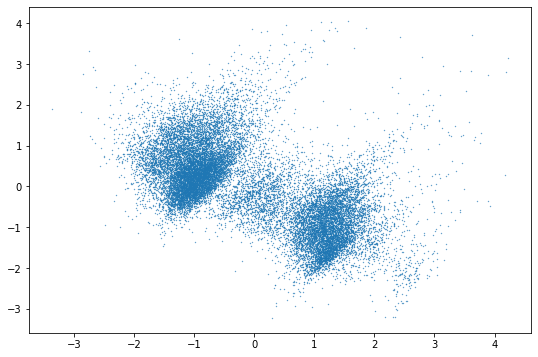

In [6]:
# visualizing the outlier free data

import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))
plt.scatter(outlier_free_data['pc1'], outlier_free_data['pc2'], s=0.1)
plt.show()

In [7]:
# storing the final preprocessed data in a csv file

outlier_free_data.to_csv('preprocessed_data.csv', header=False, index=False)